In [1]:
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline
from scipy import integrate

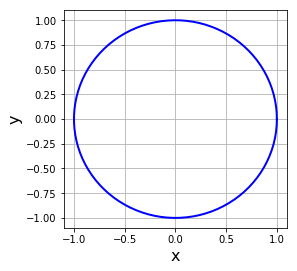

In [6]:
u_inf = 1.0
R = 1.0
x_cen, y_cen = 0.0, 0.0
theta = np.linspace(0.0, 2 * np.pi, 100)
x_cyl, y_cyl = (x_cen + R * np.cos(theta),
                y_cen + R * np.sin(theta))

size = 4
py.figure(figsize=(size,size))
py.grid()
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)
py.plot(x_cyl, y_cyl, color='b', linestyle='-', linewidth=2)
py.xlim(-1.1, 1.1)
py.ylim(-1.1, 1.1);

In [10]:
class Panel:
    def __init__(self, xa, ya, xb, yb):
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa + xb) / 2, (ya + yb) / 2
        self.length = np.sqrt((xb - xa)**2 + (yb - ya)**2)
        
        if xb - xa <= 0.:
            self.beta = np.arccos((yb - ya) / self.length)
        elif xb - xa > 0.:
            self.beta = np.pi + np.arccos(-(yb - ya) / self.length)
        
        self.sigma = 0.0 #source strength
        self.vt = 0.0    #tangential velocity
        self.cp = 0.0    #pressure coefficient

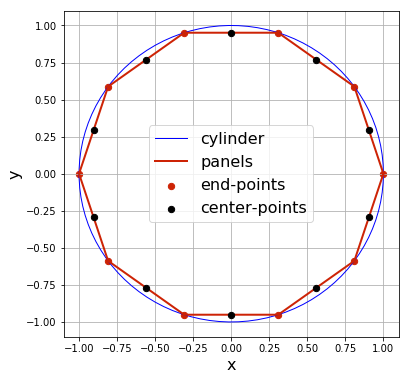

In [11]:
N_panels = 10

#endpoints
x_ends = R * np.cos(np.linspace(0.0, 2 * np.pi, N_panels + 1))
y_ends = R * np.sin(np.linspace(0.0, 2 * np.pi, N_panels + 1))

panels = np.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i + 1], y_ends[i + 1])

size = 6
py.figure(figsize=(size,size))
py.grid()
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)
py.plot(x_cyl, y_cyl, label='cylinder', color='b', 
        linestyle='-', linewidth=1)
py.plot(x_ends, y_ends, label='panels', color='#CD2305',
        linestyle='-', linewidth=2)
py.scatter([p.xa for p in panels], [p.ya for p in panels],
               label='end-points', color='#CD2305', s=40)
py.scatter([p.xc for p in panels], [p.yc for p in panels],
               label='center-points', color='k', s=40, zorder=3)
py.legend(loc='best', prop={'size':16})
py.xlim(-1.1, 1.1)
py.ylim(-1.1, 1.1);